# Likelihood

Likelihood is the **plausibility** of observing your data **given a specific model** or parameter value.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide19.png)

# Key Formula

The likelihood for a model $\text{M}$ based on data $\text{D}$ is:

$$
\mathcal{L}(\text{M}\mid\text{D}) = P(\text{D}\mid\text{M})
$$

Where:
- $\mathcal{L}$ is the likelihood function for model $\text{M}$ under data $\text{D}$
- $\text{M}$ represents the model
- $\text{D}$ represents the observed data
- $P(\text{D}|\text{M})$ is the probability of observing data $\text{D}$ given the model $\text{M}$

# Technical Details

## From Single to Multiple Samples
For a single observation $\text{D}_1$:

$$
\mathcal{L}(\text{M}\mid\text{D}_1) = P(\text{D}_1|\text{M})
$$

For multiple **independent** observations $\text{D} = \{\text{D}_1,\dots,\text{D}_N \}$, the joint probability of multiple independent samples is the product of their individual probabilities:

$$
\mathcal{L}(\text{M}\mid\text{D}) = \prod_{i=1}^{N} P(\text{D}_i|\text{M})
$$

## Log-Likelihood
We often work with log-likelihood (rather than the likelihood itself) for computational stability:

$$
\ell(\text{M}|\text{D}) = \log \mathcal{L}(\text{M}|\text{D})
$$

The $\log$ transformation converts products to sums, making calculations easier and preventing numerical underflow with very small probabilities.

In this series of lectures, unless otherwise specified, we use **log base e**.

# Related Topics

- [ordinary least squares](https://statfungen.github.io/statgen-primer/ordinary_least_squares.html)
- [summary statistics](https://statfungen.github.io/statgen-primer/summary_statistics.html)

# Example

Assuming that we are interested in the effect of a genetic variant on the height measurement with five available samples, we want to compare the following three models:
- Model 1: no genetic effect ($\beta=0$)
- Model 2: moderate genetic effect ($\beta=0.5$)
- Model 3: large genetic effect ($\beta=1.0$)

**How do I know from the data which model is most plausible?**

This is where likelihood comes in - it helps us evaluate how well each model explains our observed data. We'll generate some example data where we know the true effect size ($\beta = 0.4$), then calculate the likelihood under each of our three theories to see which one the data supports most strongly.

Let's first generate the genotype data and trait values for 5 individuals.

In [1]:
# Clear the environment
rm(list = ls())
set.seed(19)  # For reproducibility

# Generate genotype data for 5 individuals at a single variant
N <- 5
genotypes <- c("CC", "CT", "TT", "CT", "CC")  # Individual genotypes
names(genotypes) <- paste("Individual", 1:N)

# Define alternative allele
alt_allele <- "T"

# Convert to additive genotype coding (count of alternative alleles)
Xraw_additive <- numeric(N)
for (i in 1:N) {
  alleles <- strsplit(genotypes[i], "")[[1]]
  Xraw_additive[i] <- sum(alleles == alt_allele)
}
names(Xraw_additive) <- names(genotypes)

# Standardize genotypes
X <- scale(Xraw_additive, center = TRUE, scale = TRUE)[,1]

In [2]:
# Set true beta and generate phenotype data
true_beta <- 0.4
true_sd <- 1.0

# Generate phenotype with true effect
Y <- X * true_beta + rnorm(N, 0, true_sd)

Now, let's create two functions to compute the likelihood and log-likelihood under different models (in this case, different $\beta$ values) for the effect of a genetic variant on height:

In [3]:
# Likelihood function for normal distribution
likelihood <- function(beta, sd, X, Y) {
  # Calculate expected values under the model
  mu <- X * beta
  # Calculate likelihood (product of normal densities)
  prod(dnorm(Y, mean = mu, sd = sd, log = FALSE))
}

# Log-likelihood function (more numerically stable)
log_likelihood <- function(beta, sd, X, Y) {
  # Calculate expected values under the model
  mu <- X * beta
  # Calculate log-likelihood (sum of log normal densities)
  sum(dnorm(Y, mean = mu, sd = sd, log = TRUE))
}


Now, let's apply this function to our three models:

In [4]:
# Test three different models with different beta values
beta_values <- c(0, 0.5, 1.0)  # Three different effect sizes to test
model_names <- paste0("Model ", 1:3, "\n(beta = ", beta_values, ")")

# Calculate likelihoods and log-likelihoods
results <- data.frame(
  Model = model_names,
  Beta = beta_values,
  Likelihood = numeric(3),
  Log_Likelihood = numeric(3)
)

for (i in 1:3) {
  results$Likelihood[i] <- likelihood(beta = beta_values[i], sd = true_sd, X = X, Y = Y)
  results$Log_Likelihood[i] <- log_likelihood(beta = beta_values[i], sd = true_sd, X = X, Y = Y)
}

The results are:

In [5]:
results

Model,Beta,Likelihood,Log_Likelihood
<chr>,<dbl>,<dbl>,<dbl>
Model 1 (beta = 0),0.0,0.001891561,-6.270353
Model 2 (beta = 0.5),0.5,0.003759907,-5.583361
Model 3 (beta = 1),1.0,0.002749409,-5.896369


Let’s visualize the likelihood and log-likelihood for these three models. A higher value in either metric indicates a stronger fit, suggesting the data provides greater support for that specific model.

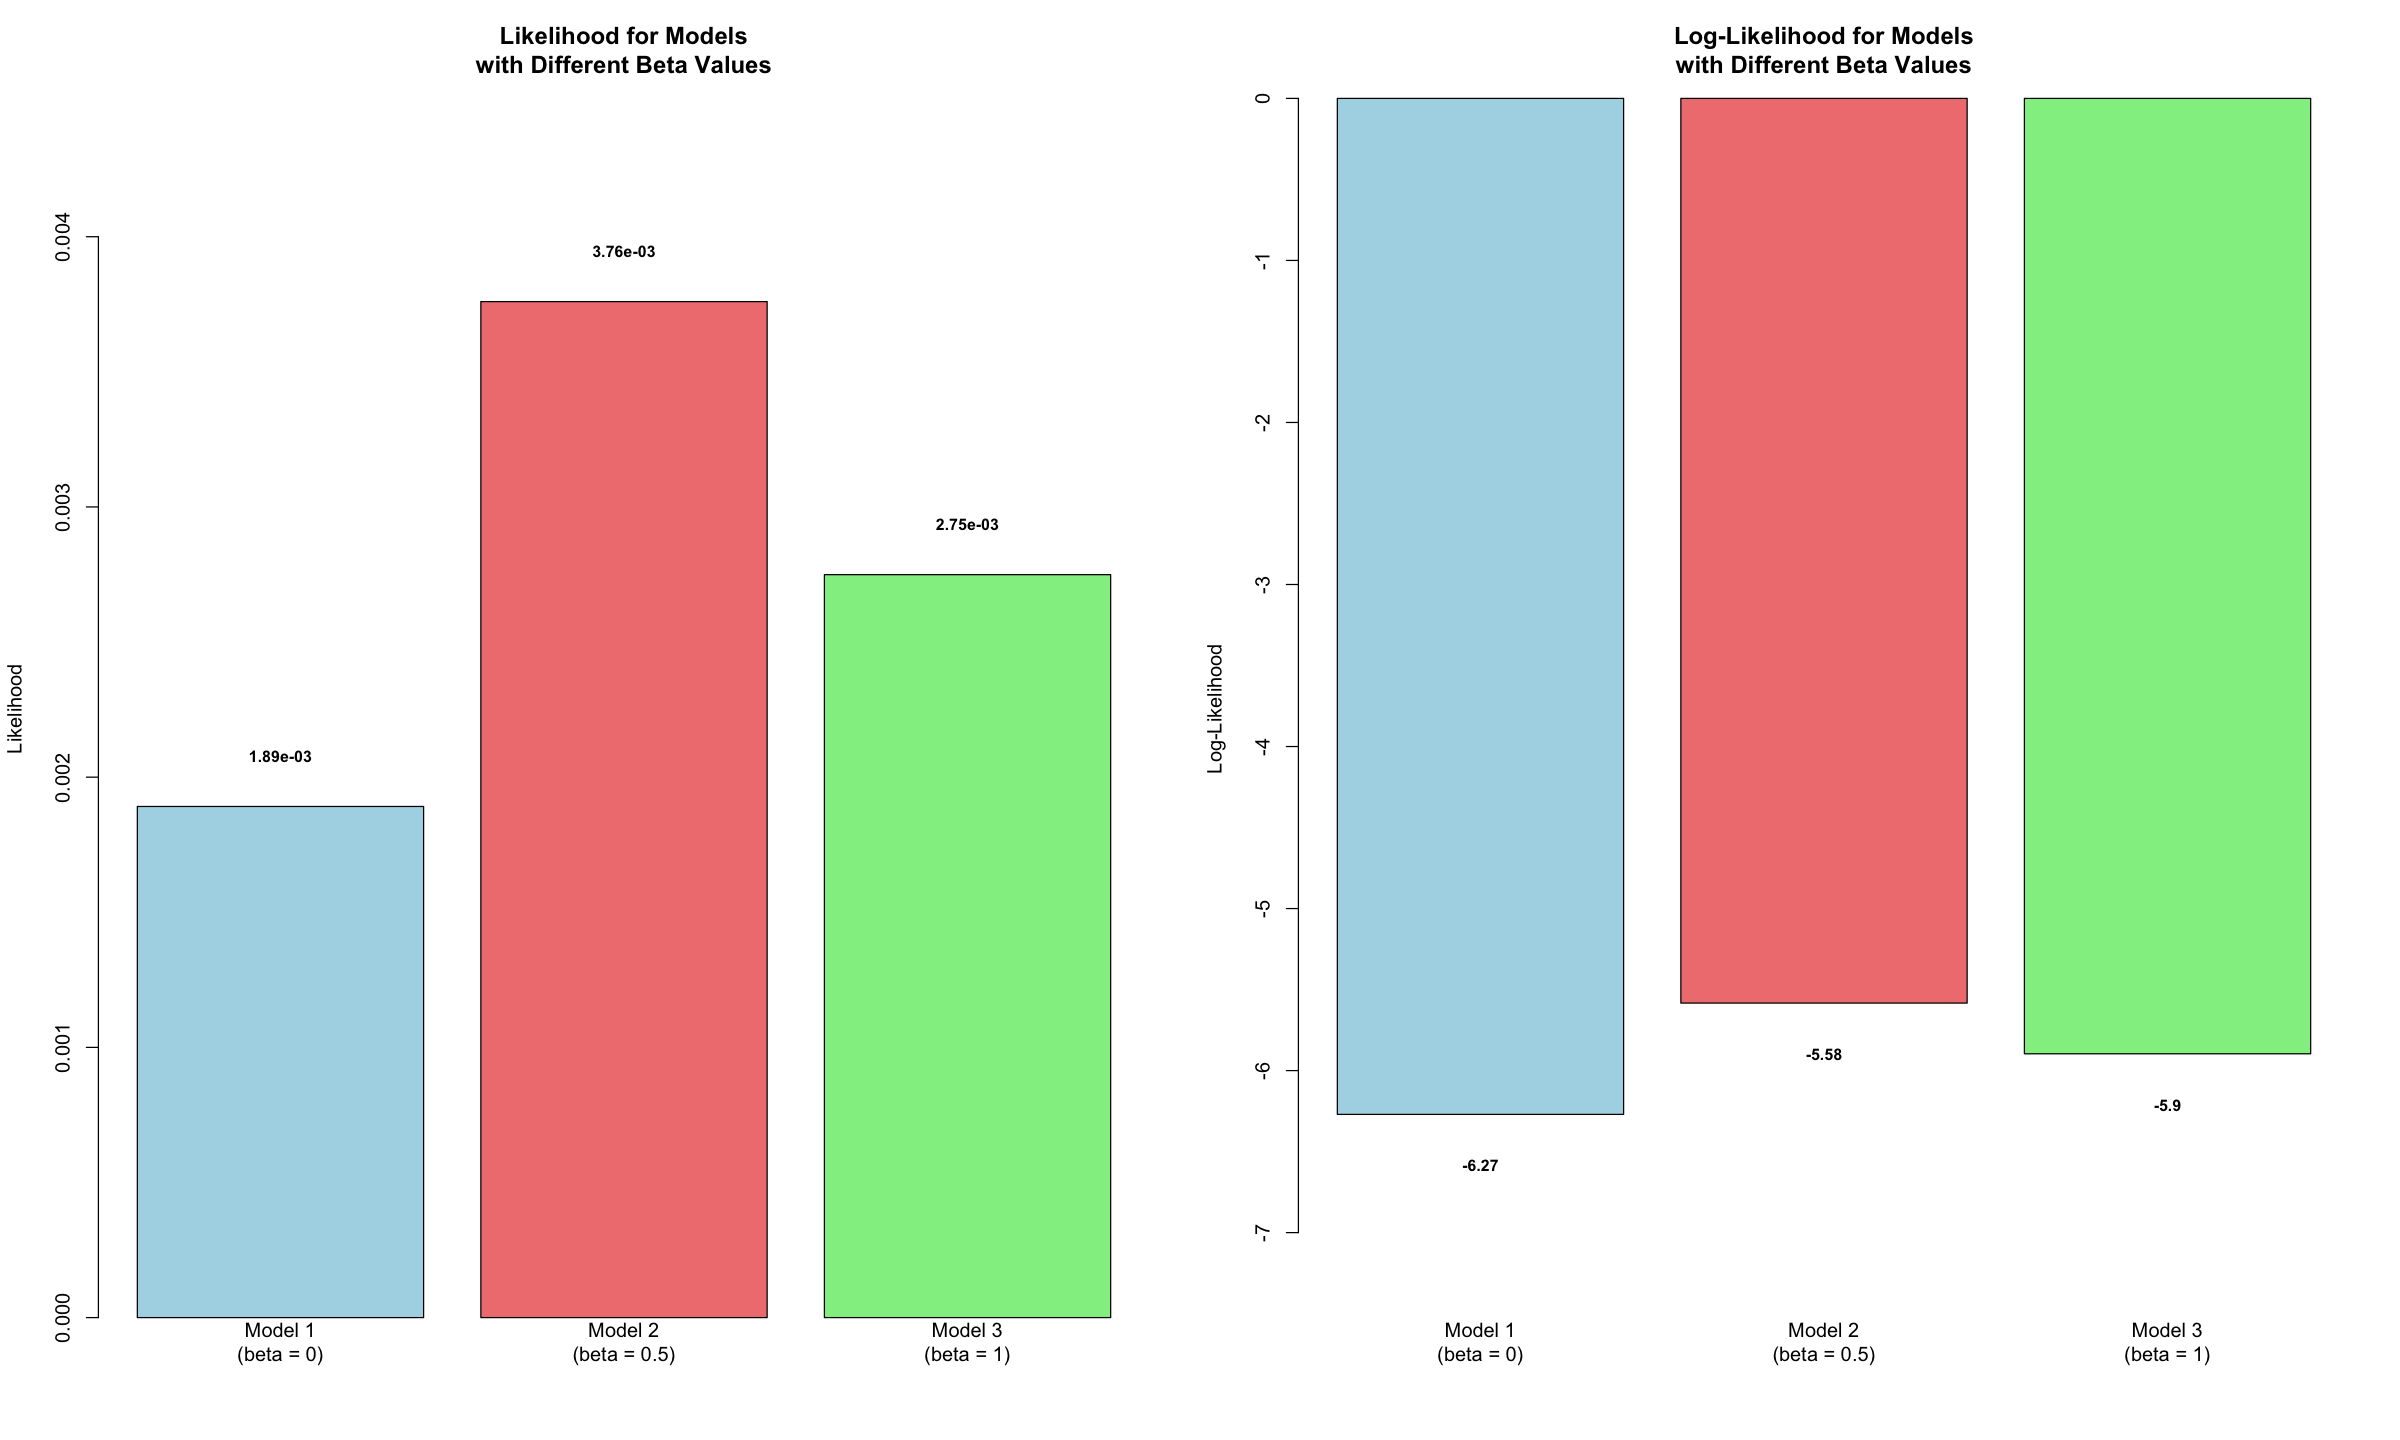

In [11]:
options(repr.plot.width = 20, repr.plot.height = 12) 

# 1. Setup the side-by-side layout (1 row, 2 columns)
par(mfrow = c(1, 2))

# 2. Create barplot of Likelihoods
# We increase the top margin slightly to fit the scientific notation labels
barplot(results$Likelihood, 
        names.arg = results$Model,
        main = "Likelihood for Models\nwith Different Beta Values",
        ylab = "Likelihood",
        col = c("lightblue", "lightcoral", "lightgreen"),
        border = "black",
        ylim = c(0, max(results$Likelihood) * 1.2)) # 20% extra space for labels

# Add scientific notation values on top
text(x = seq(0.7, by = 1.2, length.out = length(results$Model)), 
     y = results$Likelihood + max(results$Likelihood) * 0.05,
     labels = format(results$Likelihood, scientific = TRUE, digits = 3),
     cex = 0.8,
     font = 2)

# 3. Create barplot of Log-Likelihoods
barplot(results$Log_Likelihood,
        names.arg = results$Model,
        main = "Log-Likelihood for Models\nwith Different Beta Values",
        ylab = "Log-Likelihood",
        col = c("lightblue", "lightcoral", "lightgreen"),
        border = "black",
        # Log-likelihood is negative, so we extend the bottom of the Y axis
        ylim = c(min(results$Log_Likelihood) * 1.2, 0))

# Add rounded values below the bars
text(x = seq(0.7, by = 1.2, length.out = length(results$Model)),
     y = results$Log_Likelihood - abs(min(results$Log_Likelihood)) * 0.05,
     labels = round(results$Log_Likelihood, 2),
     cex = 0.8,
     font = 2)

# 4. Reset layout to default (optional)
par(mfrow = c(1, 1))

# Supplementary

## Graphical Summary

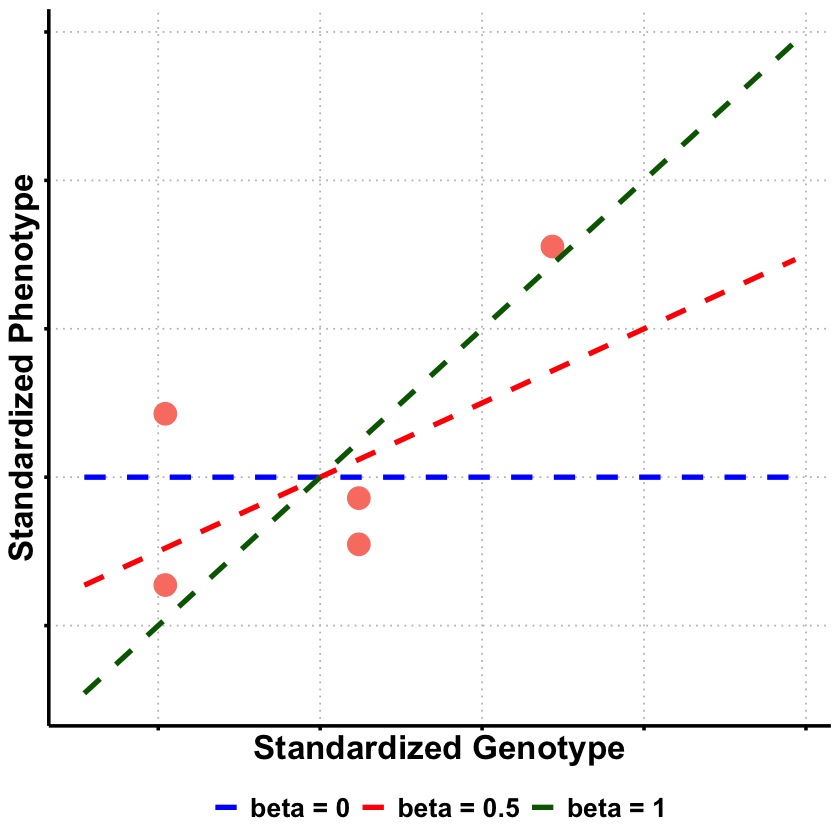

In [8]:
library(ggplot2)
df_scatter <- data.frame(
  Genotype = X,
  Phenotype = Y
)

# Create plot
p1a <- ggplot(df_scatter, aes(x = Genotype, y = Phenotype)) +
  geom_point(color = "salmon", size = 6) +
  labs(
    x = "Standardized Genotype",
    y = "Standardized Phenotype"
  ) +
  theme_minimal() +
  theme(
    # Font styling
    text = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 20, face = "bold"),
    
    # Hide axis tick labels
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    
    # Customize grid and axes
    panel.grid.major = element_line(color = "gray", linetype = "dotted"),
    panel.grid.minor = element_blank(),
    axis.line = element_line(linewidth = 1),
    axis.ticks = element_line(linewidth = 1),
    
    # Transparent background
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA)
  )

# Create sequence of x values for smooth lines
x_vals <- seq(min(X) - 0.5, max(X) + 1.5, length.out = 100)

# Create updated data frame for lines
lines_df <- data.frame(
 Genotype = rep(x_vals, 3),
 Phenotype = c(
   0 * x_vals,
   0.5 * x_vals,
   1 * x_vals
 ),
 Model = factor(rep(c("beta = 0", "beta = 0.5", "beta = 1"), each = length(x_vals)),
                levels = c("beta = 0", "beta = 0.5", "beta = 1"))
)

# Add dashed lines with plain labels
p1b <- p1a +
 geom_line(data = lines_df, aes(x = Genotype, y = Phenotype, color = Model, linetype = Model), linewidth = 1.5) +
 scale_color_manual(values = c("beta = 0" = "blue", "beta = 0.5" = "red", "beta = 1" = "darkgreen")) +
 scale_linetype_manual(values = c("beta = 0" = "dashed", "beta = 0.5" = "dashed", "beta = 1" = "dashed")) +
 theme(
   legend.title = element_blank(),
   legend.position = "bottom",
   legend.text = element_text(size = 16, face = "bold")
 )

# Show and save plot
print(p1b)
ggsave("./figures/likelihood_data_fitted.png", plot = p1b,
      width = 6, height = 6, dpi = 300, bg = "transparent")

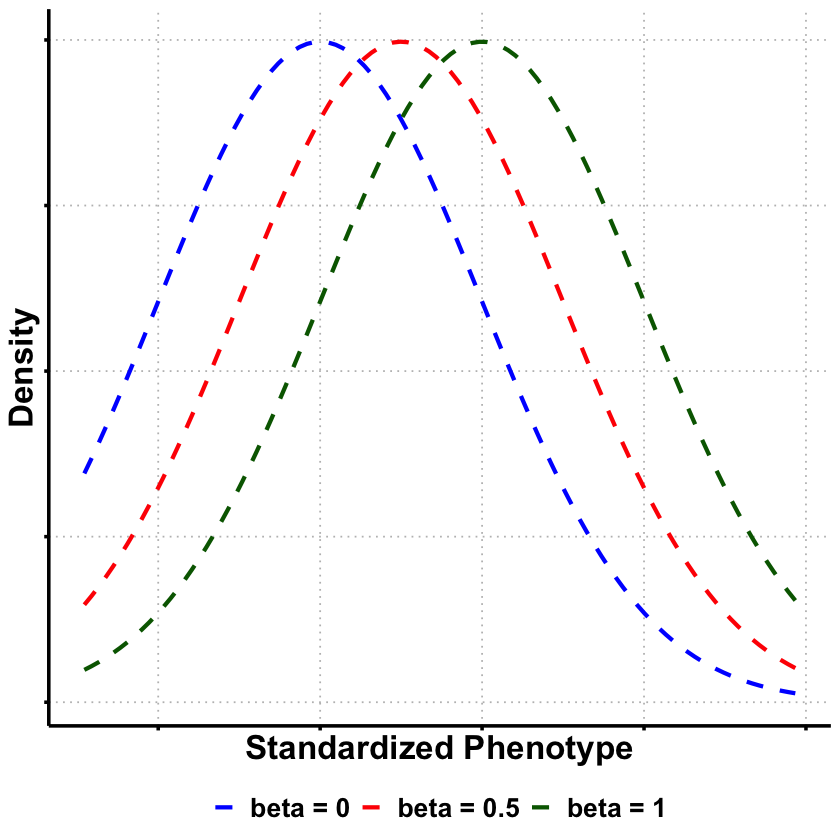

In [9]:
# Create a data frame for likelihood curves
baseline <- 0  # baseline for standardized data
genotype <- 1  # example genotype value for visualization

df_likelihood <- data.frame(
 Phenotype = x_vals,
 `beta = 0` = dnorm(x_vals, mean = baseline, sd = true_sd),
 `beta = 0.5` = dnorm(x_vals, mean = baseline + 0.5 * genotype, sd = true_sd),
 `beta = 1` = dnorm(x_vals, mean = baseline + 1 * genotype, sd = true_sd)
)

# Reshape to long format
df_long_lik <- reshape2::melt(df_likelihood, id.vars = "Phenotype", 
                             variable.name = "Model", value.name = "Density")
levels(df_long_lik$Model) <- c("beta = 0", "beta = 0.5", "beta = 1")

# Plot the likelihood curves
p2 <- ggplot(df_long_lik, aes(x = Phenotype, y = Density, color = Model, linetype = Model)) +
 geom_line(linewidth = 1.2) +
 scale_color_manual(values = c("beta = 0" = "blue", "beta = 0.5" = "red", "beta = 1" = "darkgreen")) +
 scale_linetype_manual(values = c("beta = 0" = "dashed", "beta = 0.5" = "dashed", "beta = 1" = "dashed")) +
 labs(
   x = "Standardized Phenotype",
   y = "Density"
 ) +
 theme_minimal() +
 theme(
   text = element_text(size = 18, face = "bold"),
   axis.title = element_text(size = 20, face = "bold"),
   axis.text.x = element_blank(),
   axis.text.y = element_blank(),
   panel.grid.major = element_line(color = "gray", linetype = "dotted"),
   panel.grid.minor = element_blank(),
   axis.line = element_line(linewidth = 1),
   axis.ticks = element_line(linewidth = 1),
   panel.background = element_rect(fill = "transparent", color = NA),
   plot.background = element_rect(fill = "transparent", color = NA),
   legend.title = element_blank(),
   legend.position = "bottom",
   legend.text = element_text(size = 16, face = "bold")
 )

# Show and save the plot
print(p2)
ggsave("./figures/likelihood_density.png", plot = p2,
      width = 6, height = 6, dpi = 300, bg = "transparent")